In [1]:
##### DATA DESCRIPTION #####

In [2]:
### CREATE NUMPY ARRAY OF DATA ###

# Imports
import numpy as np

# Open file and make list
file_name = 'Salt_Marsh_data.txt'
file = open(file_name)
all_data = []

# Read the column names and split on tabs
column_names = file.readline().strip().split("\t")

# Make list of lists then turn into numpy array
for line in file:                                  # go through each line in file
    data = line.strip().split("\t")                # strips line feed off string and splits line off tabs
    clean_data = []
    for item in data[4:8]:                         # only include snail and jfc count and biomass data      
        clean_data.append(item)                    # list of strings for each sample
    all_data.append(clean_data)                    # list of all lists of strings
array = np.asarray(all_data, dtype = float)        # create numpy array of all data as floats

In [3]:
### MEAN, MEDIAN, STANDARD DEVIATION ###

# Calculate mean, median, standard deviation of each column in the numpy array
means = np.mean(array, axis = 0)
medians = np.median(array, axis = 0)    
std = np.std(array, axis = 0)

# Print snail Count statistics
print("Snail Count Data:")
print("Mean:", means[0])
print("Median:", medians[0])
print("Standard Deviation:", std[0])

# Print snail biomass statistics
print("\nSnail Biomass Data:")
print("Mean:", means[1])
print("Median:", medians[1])
print("Standard Deviation:", std[1])
                
# Print JFC count statistics
print("\nJuvenile Fiddler Crab Count Data:") 
print("Mean:", means[2])
print("Median:", medians[2])
print("Standard Deviation:", std[2])

# Print JFC biomass statistics
print("\nJuvenile Fiddler Crab Biomass Data:")
print("Mean:", means[3])
print("Median:", medians[3])
print("Standard Deviation:", std[3])

Snail Count Data:
Mean: 9.440972222222221
Median: 3.0
Standard Deviation: 14.146676647393027

Snail Biomass Data:
Mean: 0.12273263888888884
Median: 0.039
Standard Deviation: 0.18390679641610916

Juvenile Fiddler Crab Count Data:
Mean: 8.503472222222221
Median: 6.0
Standard Deviation: 8.067853848543038

Juvenile Fiddler Crab Biomass Data:
Mean: 0.17006944444444436
Median: 0.12
Standard Deviation: 0.16135707697086066


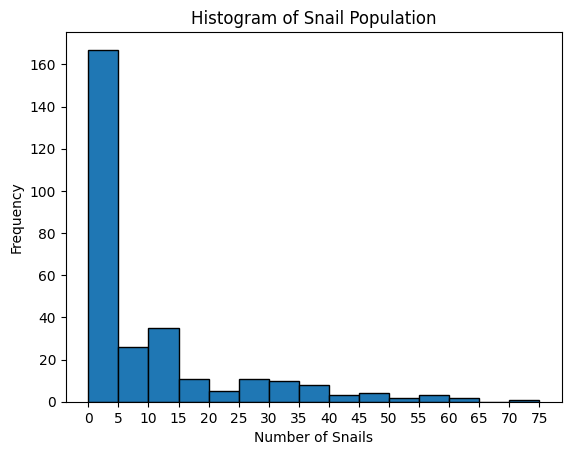

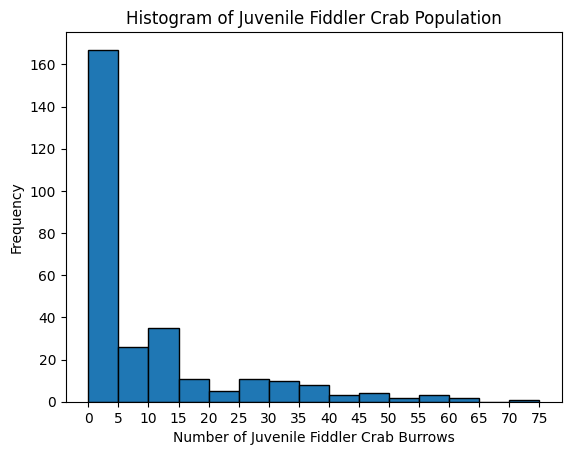

In [4]:
### HISTOGRAMS OF SNAIL AND JFC COUNTS ###

# Imports
import numpy as np
import matplotlib.pyplot as plt

# Open file
file_name = 'Salt_Marsh_data.txt'
file = open(file_name)

# Read the column names and split on tabs
column_names = file.readline().strip().split("\t")

# Make lists
snail_data = []
jfc_data = []

# Append snail and jfc count data to correct list
for line in file:                          # go through each line in file
    data = line.strip().split("\t")        # strips line feed off string and splits line off tabs
    snail_count = data[4]                  
    snail_data.append(float(snail_count))  # add snail count data to list
    jfc_count = data[6]
    jfc_data.append(float(jfc_count))      # add jfc count data to list

### PLOT SNAIL HISTOGRAM ###

# X-axis bins
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
plt.hist(snail_data, bins=bin_edges, edgecolor='black')
plt.xticks(bin_edges)

# Set chart labels
plt.title('Histogram of Snail Population')
plt.xlabel('Number of Snails')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### PLOT JFC HISTOGRAM ###

# X-axis bins
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
plt.hist(snail_data, bins=bin_edges, edgecolor='black')
plt.xticks(bin_edges)

# Set chart labels
plt.title('Histogram of Juvenile Fiddler Crab Population')
plt.xlabel('Number of Juvenile Fiddler Crab Burrows')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [5]:
##### CORRELATION #####

In [6]:
### PEARSON AND SPEARMAN CORRELATION COEFFIECIENTS ###

# Imports
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

# Convert snail and jfc data lists to numpy arrays for easier handling
snail_data = np.array(snail_data)
jfc_data = np.array(jfc_data)

# Assign x and y values
x = jfc_data
y = snail_data
    
# Pearson Correlation calculation for jfc and snail count data
PCC = stats.pearsonr(x, y)
P = PCC.statistic                  # pearson coeff
print("Pearson =", f"{P:.3f}")     # print to 3 decimal places
    
# Spearman Correlation calculation for jfc and snail count data
SCC = stats.spearmanr(x, y)
S = SCC.statistic                 # spearman coeff
print("Spearman =", f"{S:.3f}")   # print to 3 decimal places

Pearson = -0.318
Spearman = -0.247


In [7]:
### CONDUCT LINEAR REGRESSION ###

# Calculate the linear regression line
LR = stats.linregress(x, y)  # All linear regression values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)  # Identify slope and intercept for regression line generation

# Print linear regression results
print("Slope:", slope, "\nIntercept:", intercept, "\nR Value:", r_value, "\nP Value:", p_value, "\nStandard Error:", std_err)
print("\n", LR)

Slope: -0.5571291425743307 
Intercept: 14.178504410293526 
R Value: -0.3177309137041817 
P Value: 3.545497401973218e-08 
Standard Error: 0.09831156333840779

 LinregressResult(slope=-0.5571291425743307, intercept=14.178504410293526, rvalue=-0.3177309137041817, pvalue=3.545497401973218e-08, stderr=0.09831156333840779, intercept_stderr=1.152383074790259)


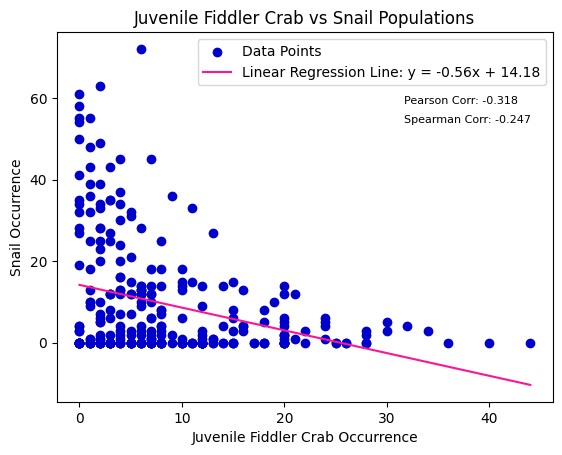

In [8]:
### GENERATE SCATTER PLOT ###

# Create a scatter plot of jfc and snail count data
fig, ax = plt.subplots()
ax.scatter(jfc_data, snail_data, label = "Data Points", color = "mediumblue") 

# Plot the regression line
line_x = np.linspace(min(jfc_data), max(jfc_data), 100)  # Generate x values for the line
line_y = slope * line_x + intercept  # Calculate y values for the regression line
ax.plot(line_x, line_y, color = "deeppink", label = f"Linear Regression Line: y = {slope:.2f}x + {intercept:.2f}")

# Set chart labels
ax.set_xlabel("Juvenile Fiddler Crab Occurrence")
ax.set_ylabel("Snail Occurrence")
plt.title("Juvenile Fiddler Crab vs Snail Populations")

# Add a legend
ax.legend()  

# Add the correlations as text in the plot
ax.text(0.70, 0.80, f"Pearson Corr: {P:.3f}", transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
ax.text(0.70, 0.75, f"Spearman Corr: {S:.3f}", transform=ax.transAxes, fontsize=8, verticalalignment='bottom')

# Show the plot
plt.show()

In [9]:
##### DIMENSTIONALITY REDUCTION #####

In [10]:
### PRINCIPAL COMPONENTS ANALYSIS ###

# Imports
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA(n_components=None)  

# Fit PCA model to the data and print components
principal_components = pca.fit_transform(array)
print("Principal Components:")
print(principal_components)

Principal Components:
[[-9.03353184e+00 -2.79211533e+00  4.31410781e-15  6.21018444e-16]
 [-1.14739886e+01  6.90758419e+00 -2.32328617e-16  3.17883320e-16]
 [-8.78948616e+00 -3.76208529e+00 -2.86921353e-16  5.72374159e-16]
 ...
 [-2.01945466e+00  1.03177291e+01 -2.06993595e-16  7.47504918e-17]
 [ 3.08020555e+00  6.44394933e+00 -1.60833699e-16  6.26394649e-17]
 [ 4.78220053e+00  3.77805697e+00 -2.17528857e-16  4.60866867e-17]]


Principal Component Weights:
 [7.88939928e-01 2.11060072e-01 3.84210272e-34 2.12997162e-35]


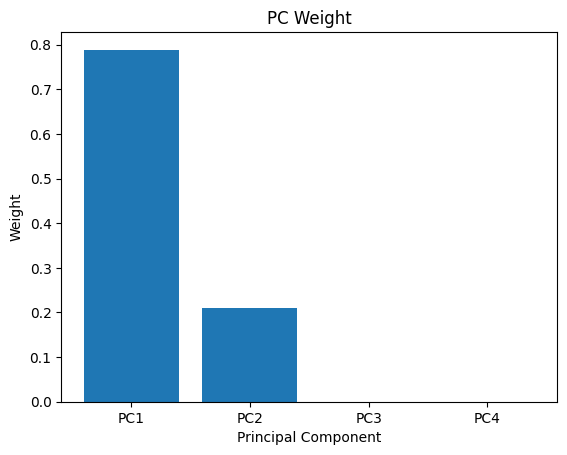

In [11]:
### EXTRACTION AND BAR CHART OF PRINCIPAL COMPONENT WEIGHTS ###

# Imports
from sklearn.decomposition import PCA

pca = PCA(n_components=None)  
principal_components = pca.fit_transform(array)

# Extract principal component weights as explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Principal Component Weights:\n", explained_variance_ratio)

# Create bar chart
plt.figure()
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

# X-axis labels
num_components = len(explained_variance_ratio)
x_labels = [f'PC{i+1}' for i in range(num_components)]

# Set chart labels
plt.title('PC Weight')
plt.xlabel('Principal Component')
plt.xticks(range(1, num_components + 1), x_labels)
plt.ylabel('Weight')

# Show the plot
plt.show()

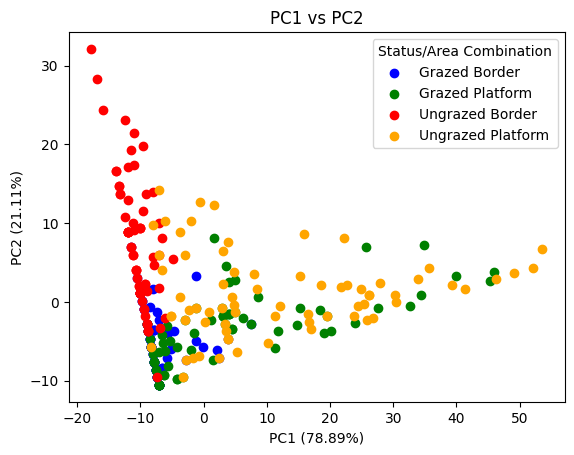

In [12]:
### PC1 VS PC2 VISUALIZATION ###

# Generate color coded plot
fig, ax = plt.subplots()
ax.scatter(principal_components[:72, 0], principal_components[:72, 1], c = "blue", label = "Grazed Border")            # Grazed Border Samples 
ax.scatter(principal_components[73:144, 0], principal_components[73:144, 1], c = "green", label = "Grazed Platform")   # Grazed Platform Samples
ax.scatter(principal_components[145:216, 0], principal_components[145:216, 1], c = "red", label = "Ungrazed Border")   # Ungrazed Border Samples
ax.scatter(principal_components[217:, 0], principal_components[217:, 1], c = "orange", label = "Ungrazed Platform")    # Ungrazed Platform Samples

# Set chart labels
label_X = f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}%)"
label_Y = f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
plt.title("PC1 vs PC2")

# Add legend
ax.legend(title = "Status/Area Combination", loc = 'upper right') 

# Show the plot
plt.show()